In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
## 6.2.6

In [7]:
# Import the requests library.
import requests
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350393fc9343bf41f1f18f4534f41836


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed
    
    
  
   
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thaba-tseka
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | kodinsk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | omboue
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | mlonggo
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | januaria
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | envira
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | new norfo

Processing Record 38 of Set 4 | porto torres
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | tessalit
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | tenenkou
Processing Record 44 of Set 4 | carupano
Processing Record 45 of Set 4 | jaisalmer
Processing Record 46 of Set 4 | kilindoni
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | honningsvag
Processing Record 49 of Set 4 | kloulklubed
Processing Record 50 of Set 4 | whitehorse
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | newport
Processing Record 4 of Set 5 | imbituba
Processing Record 5 of Set 5 | cape canaveral
Processing Record 6 of Set 5 | richards bay
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | campoverde
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | lasa
Processing

Processing Record 29 of Set 8 | manoel urbano
Processing Record 30 of Set 8 | oyama
Processing Record 31 of Set 8 | mokhotlong
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | lima
Processing Record 35 of Set 8 | santiago
Processing Record 36 of Set 8 | passo de camaragibe
Processing Record 37 of Set 8 | trenggalek
Processing Record 38 of Set 8 | yulara
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | morondava
Processing Record 41 of Set 8 | young
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | taperoa
Processing Record 44 of Set 8 | jardim
Processing Record 45 of Set 8 | khatanga
Processing Record 46 of Set 8 | whitley bay
Processing Record 47 of Set 8 | teguldet
Processing Record 48 of Set 8 | shimoda
Processing Record 49 of Set 8 | tahoua
Processing Record 50 of Set 8 | kingman
Processing Record 1 of Set 9 | westport
Processing Record 2 of Set 9 | dunedin
Processing Re

Processing Record 17 of Set 12 | kanina
Processing Record 18 of Set 12 | celestun
Processing Record 19 of Set 12 | sao filipe
Processing Record 20 of Set 12 | nurota
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | ambilobe
Processing Record 23 of Set 12 | lagunas
Processing Record 24 of Set 12 | urengoy
Processing Record 25 of Set 12 | marsh harbour
Processing Record 26 of Set 12 | kimbe
Processing Record 27 of Set 12 | pakhtakoron
Processing Record 28 of Set 12 | senneterre
Processing Record 29 of Set 12 | linguere
Processing Record 30 of Set 12 | goundam
Processing Record 31 of Set 12 | livingston
Processing Record 32 of Set 12 | faya
Processing Record 33 of Set 12 | yenagoa
Processing Record 34 of Set 12 | wajir
Processing Record 35 of Set 12 | ciras
City not found. Skipping...
Processing Record 36 of Set 12 | eskil
Processing Record 37 of Set 12 | dolores
Processing Record 38 of Set 12 | omsukchan
Processing Record 39 of Set 12 | namatanai
Processing Rec

In [10]:
len(city_data)

565

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thaba-Tseka,-29.5220,28.6084,51.53,47,0,4.70,LS,2021-12-29 20:05:25
1,Port Alfred,-33.5906,26.8910,66.13,72,88,6.49,ZA,2021-12-29 20:05:25
2,Comodoro Rivadavia,-45.8667,-67.5000,76.86,22,0,28.77,AR,2021-12-29 20:05:25
3,Mataura,-46.1927,168.8643,56.48,90,98,5.37,NZ,2021-12-29 20:05:26
4,Cape Town,-33.9258,18.4232,64.89,74,35,5.99,ZA,2021-12-29 20:05:26
5,Busselton,-33.6500,115.3333,63.09,91,1,10.02,AU,2021-12-29 20:05:27
6,Qaanaaq,77.4840,-69.3632,-4.36,70,100,1.03,GL,2021-12-29 20:05:27
7,Kapaa,22.0752,-159.3190,77.32,78,75,4.00,US,2021-12-29 20:05:27
8,Kodinsk,58.6881,99.1844,2.46,97,100,4.03,RU,2021-12-29 20:05:28
9,Punta Arenas,-53.1500,-70.9167,55.51,38,40,37.98,CL,2021-12-29 20:05:28


In [12]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thaba-Tseka,LS,2021-12-29 20:05:25,-29.5220,28.6084,51.53,47,0,4.70
1,Port Alfred,ZA,2021-12-29 20:05:25,-33.5906,26.8910,66.13,72,88,6.49
2,Comodoro Rivadavia,AR,2021-12-29 20:05:25,-45.8667,-67.5000,76.86,22,0,28.77
3,Mataura,NZ,2021-12-29 20:05:26,-46.1927,168.8643,56.48,90,98,5.37
4,Cape Town,ZA,2021-12-29 20:05:26,-33.9258,18.4232,64.89,74,35,5.99
5,Busselton,AU,2021-12-29 20:05:27,-33.6500,115.3333,63.09,91,1,10.02
6,Qaanaaq,GL,2021-12-29 20:05:27,77.4840,-69.3632,-4.36,70,100,1.03
7,Kapaa,US,2021-12-29 20:05:27,22.0752,-159.3190,77.32,78,75,4.00
8,Kodinsk,RU,2021-12-29 20:05:28,58.6881,99.1844,2.46,97,100,4.03
9,Punta Arenas,CL,2021-12-29 20:05:28,-53.1500,-70.9167,55.51,38,40,37.98


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

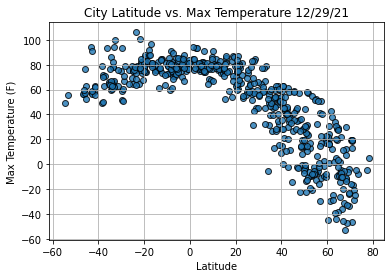

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

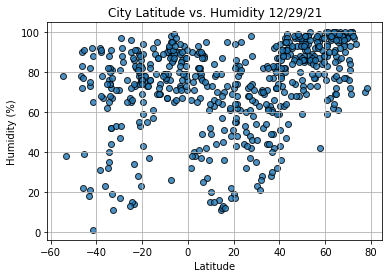

In [16]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

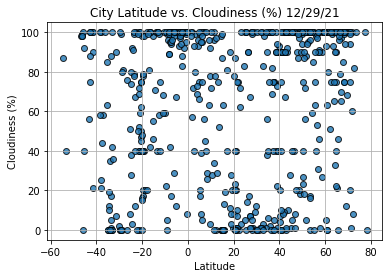

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

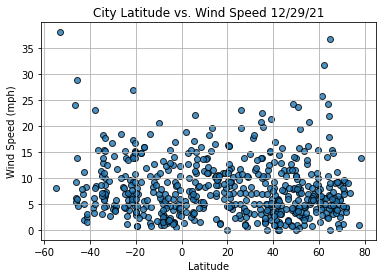

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                      Mlonggo
Country                        ID
Date          2021-12-29 20:05:29
Lat                       -6.5333
Lng                         110.7
Max Temp                    73.53
Humidity                       86
Cloudiness                    100
Wind Speed                   4.74
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
560     True
561     True
562    False
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Qaanaaq,GL,2021-12-29 20:05:27,77.4840,-69.3632,-4.36,70,100,1.03
7,Kapaa,US,2021-12-29 20:05:27,22.0752,-159.3190,77.32,78,75,4.00
8,Kodinsk,RU,2021-12-29 20:05:28,58.6881,99.1844,2.46,97,100,4.03
16,Tura,IN,2021-12-29 20:05:30,25.5198,90.2201,60.94,50,100,5.01
19,Tasiilaq,GL,2021-12-29 20:05:31,65.6145,-37.6368,2.08,61,0,4.52
...,...,...,...,...,...,...,...,...,...
559,Lubao,PH,2021-12-29 20:20:59,14.9167,120.5500,77.07,87,87,7.07
560,Qaqortoq,GL,2021-12-29 20:20:59,60.7167,-46.0333,16.30,66,0,5.44
561,Myhove,UA,2021-12-29 20:20:59,48.1575,25.3790,26.91,99,99,0.78
563,Hambantota,LK,2021-12-29 20:21:00,6.1241,81.1185,75.11,87,98,12.41


In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Qaanaaq,GL,2021-12-29 20:05:27,77.4840,-69.3632,-4.36,70,100,1.03
7,Kapaa,US,2021-12-29 20:05:27,22.0752,-159.3190,77.32,78,75,4.00
8,Kodinsk,RU,2021-12-29 20:05:28,58.6881,99.1844,2.46,97,100,4.03
16,Tura,IN,2021-12-29 20:05:30,25.5198,90.2201,60.94,50,100,5.01
19,Tasiilaq,GL,2021-12-29 20:05:31,65.6145,-37.6368,2.08,61,0,4.52


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

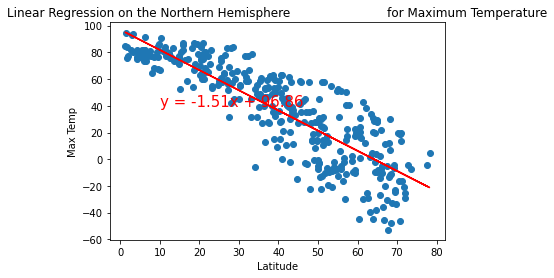

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

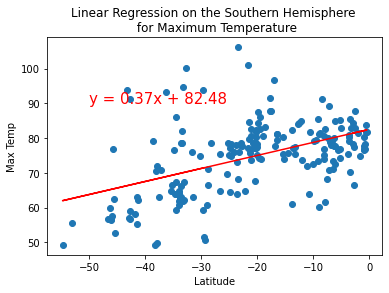

In [48]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

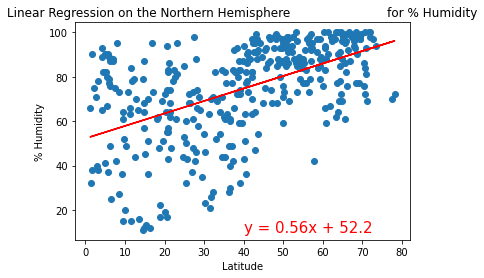

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

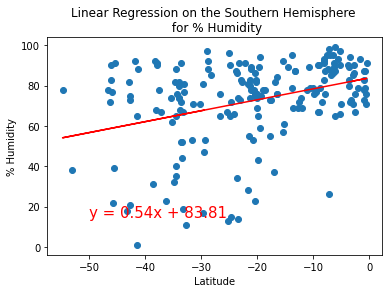

In [51]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

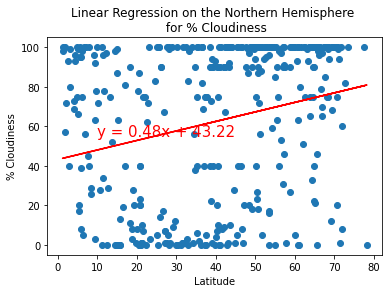

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))


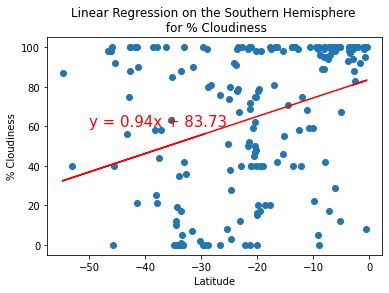

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

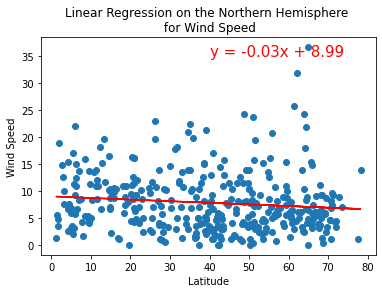

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

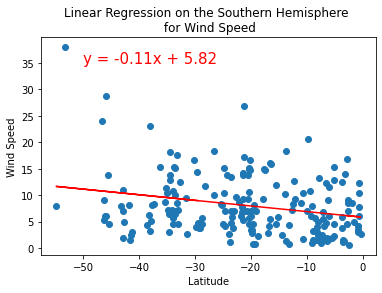

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))